In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

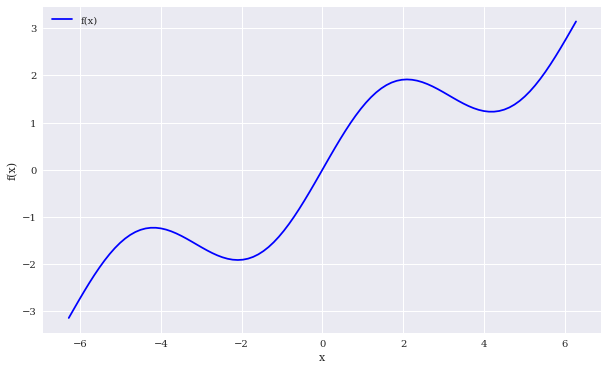

In [5]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

### 作为基函数的单项式

In [15]:
res = np.polyfit(x, f(x), deg=1, full=True)
res

(array([4.26357780e-01, 1.22124533e-16]),
 array([42.21921167]),
 2,
 array([1., 1.]),
 2.220446049250313e-14)

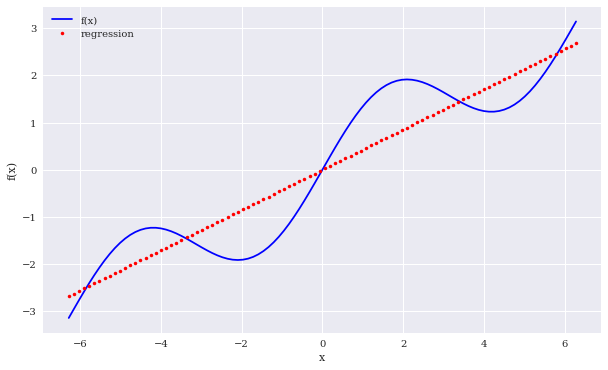

In [16]:
ry = np.polyval(res[0], x)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

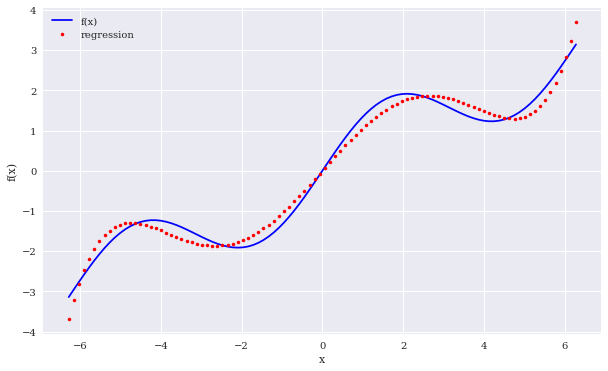

In [17]:
res1 = np.polyfit(x, f(x), deg=5, full=True)
ry1 = np.polyval(res1[0], x)
create_plot([x, x], [f(x), ry1], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

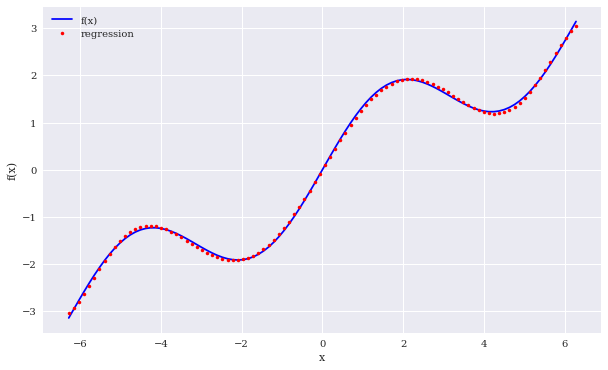

In [18]:
res2 = np.polyfit(x, f(x), deg=7, full=True)
ry2 = np.polyval(res2[0], x)
create_plot([x, x], [f(x), ry2], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [19]:
np.allclose(f(x), ry2)

False

In [20]:
np.mean((f(x) - ry2) ** 2)

0.001646362974261289

### 单独的基函数

In [21]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [22]:
new_reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
new_reg.round(4)

array([-0.    ,  0.5754,  0.    , -0.0062])

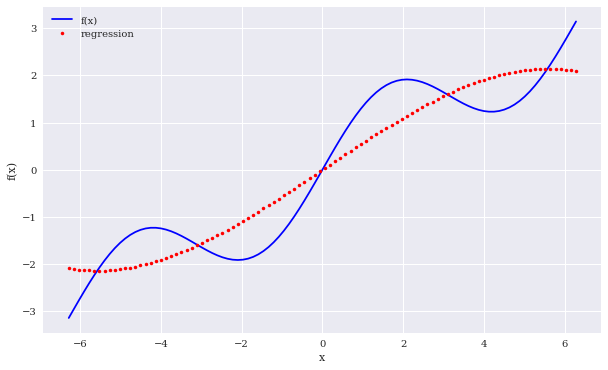

In [23]:
new_ry = np.dot(new_reg, matrix)
create_plot([x, x], [f(x), new_ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [24]:
matrix2 = matrix.copy()
matrix2[3, :] = np.sin(x)
new_reg2 = np.linalg.lstsq(matrix2.T, f(x), rcond=None)[0]

In [25]:
new_reg2.round(4)

array([-0. ,  0.5,  0. ,  1. ])

In [26]:
new_ry2 = np.dot(new_reg2, matrix2)
np.allclose(f(x), new_ry2)

True

In [27]:
np.mean((f(x) - new_ry2) ** 2)

6.882503249262226e-31

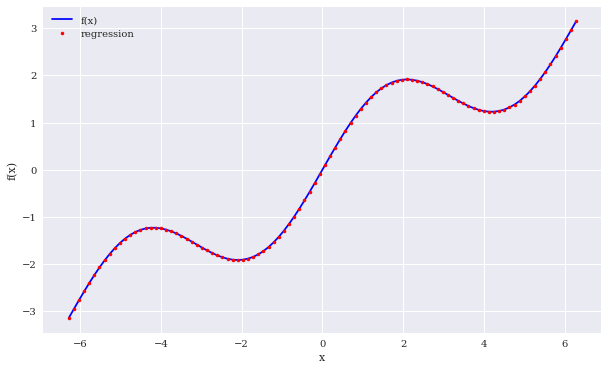

In [28]:
create_plot([x, x], [f(x), new_ry2], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

### 有噪声的数据

In [29]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

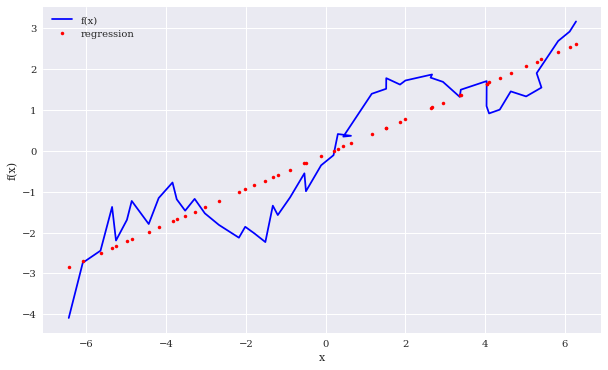

In [42]:
zs_reg = np.polyfit(xn, yn, 1)
zs_ry = np.polyval(zs_reg, xn)
create_plot([xn, xn], [yn, zs_ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])